### Insurance dataset

##### 1.)  Importing necessary libraries

In [215]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (12, 8)
plt.rcParams["figure.autolayout"] = True
import warnings
warnings.filterwarnings('ignore')

###### 2.) Reading data as a data frame  

In [216]:
df = pd.read_csv("insurance (2).csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#### 3a. Exploratory data analysis
###### 1.) Shape of the data

In [217]:
df.shape

(1338, 7)

##### 3b.)  Data type of each attribute

In [218]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


##### 3c.)  Checking the presence of missing values 

In [220]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [221]:
df.isna().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

##### 3d.)  Analysis of numeric attributes

In [222]:
df.select_dtypes(include=np.number).columns.tolist()

['age', 'bmi', 'children', 'charges']

In [223]:
#df["age"].unique()
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [224]:
df.median()

age           39.000
bmi           30.400
children       1.000
charges     9382.033
dtype: float64

###### Summary about numeric attributes : 
##### There are 3 numeric attributes i.e age, bmi and charges. Although 'childern' attribute is of interger type it can be considered as a nominal attribute(ranging between 0 to 6).
##### Numeric attributes do not have any null/missing values.
#####  'Age' is of discrete type whereas bmi and charges are of float datatype.
##### 50% of the people are of the age 39 or below. The minimum age is 18 and maximum is 64.
##### The average value of bmi of a person is 30.66.
##### At this stage, we can suspect the presence of outliers for 'charges' attribute as there is a considerable difference between the mean and the 50th percentile and also the median

##### 3e.) Distribution of ‘bmi’, ‘age’ and ‘charges’ columns

#####  Distribution plot with Kernel density estimation(KDE) curve

Text(0.5, 1.0, 'Distribution of BMI column')

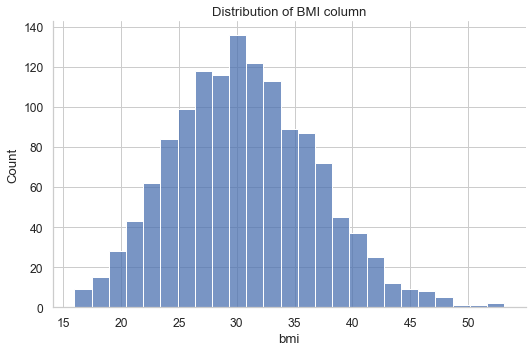

In [225]:
sns.displot(df, x='bmi', kind='hist', aspect=1.5)
plt.title('Distribution of BMI column') 

Text(0.5, 1.0, 'Distribution of Charges column')

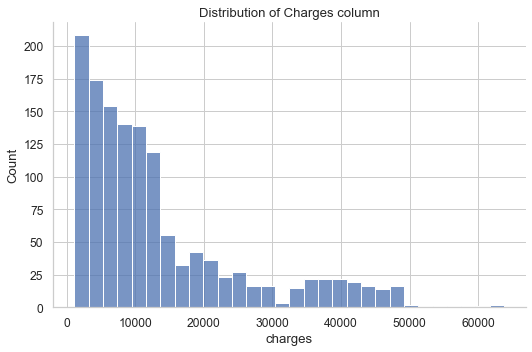

In [226]:
sns.displot(df, x='charges', kind='hist', aspect=1.5)
plt.title('Distribution of Charges column') 

Text(0.5, 1.0, 'Distribution of Age column')

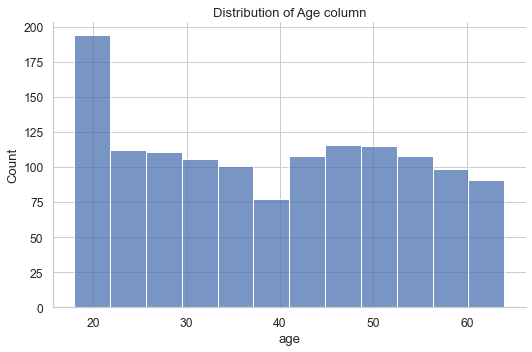

In [227]:
sns.displot(df, x='age', kind='hist', aspect=1.5)
plt.title('Distribution of Age column') 

##### KDE plot showing the skewness of data and Box plot showing the outliers in the data for 'bmi', 'age' and 'charges' column

Text(0.5, 0, 'charges')

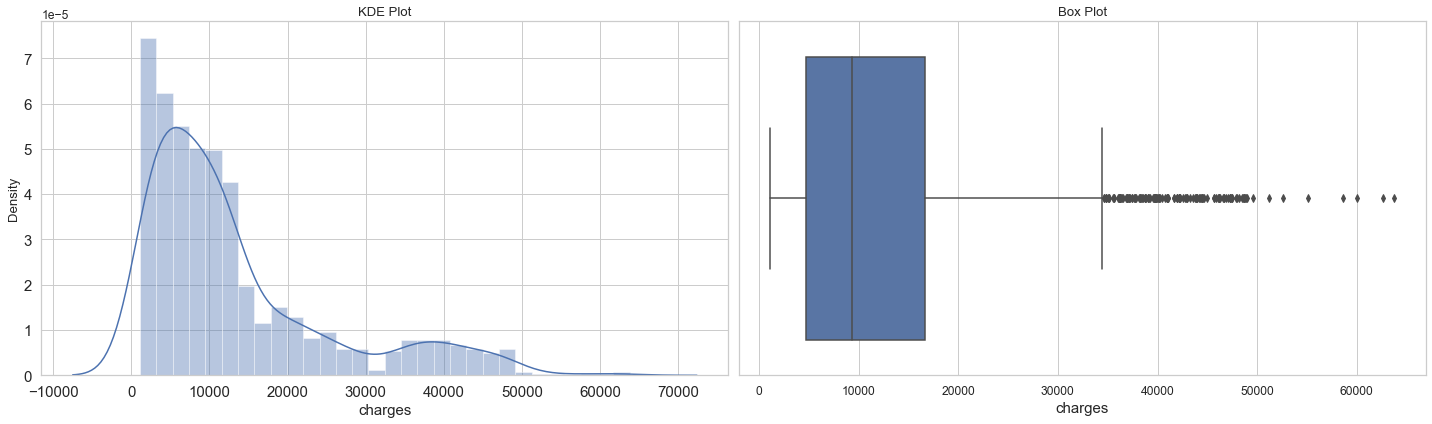

<Figure size 1080x432 with 0 Axes>

In [228]:
fig, (fig1, fig2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
plt.figure(figsize=[15,6])
fig.set_size_inches(20,6)
sns.distplot(df['charges'], ax=fig1)
fig1.tick_params(labelsize=15)
fig1.set_xlabel('charges', fontsize=15)
fig1.set_title("KDE Plot")

sns.boxplot(df['charges'], ax=fig2)
fig2.set_title("Box Plot")
fig2.set_xlabel('charges', fontsize=15)

Text(0.5, 0, 'bmi')

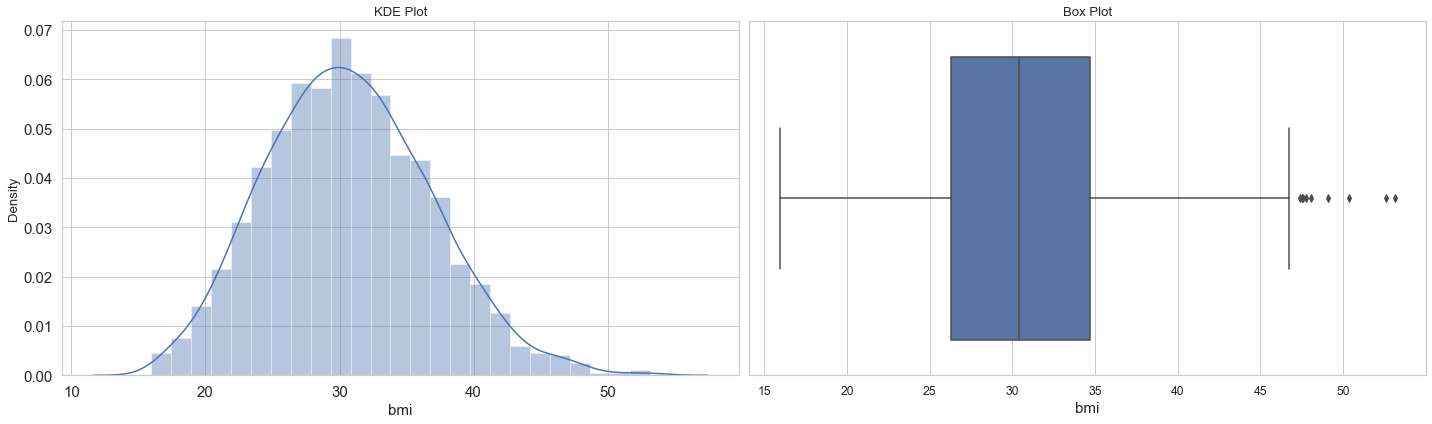

<Figure size 1080x432 with 0 Axes>

In [229]:
fig, (fig1, fig2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
plt.figure(figsize=[15,6])
fig.set_size_inches(20,6)
sns.distplot(df['bmi'], ax=fig1)
fig1.tick_params(labelsize=15)
fig1.set_xlabel('bmi', fontsize=15)
fig1.set_title("KDE Plot")

sns.boxplot(df['bmi'], ax=fig2)
fig2.set_title("Box Plot")
fig2.set_xlabel('bmi', fontsize=15)

<Figure size 432x216 with 0 Axes>

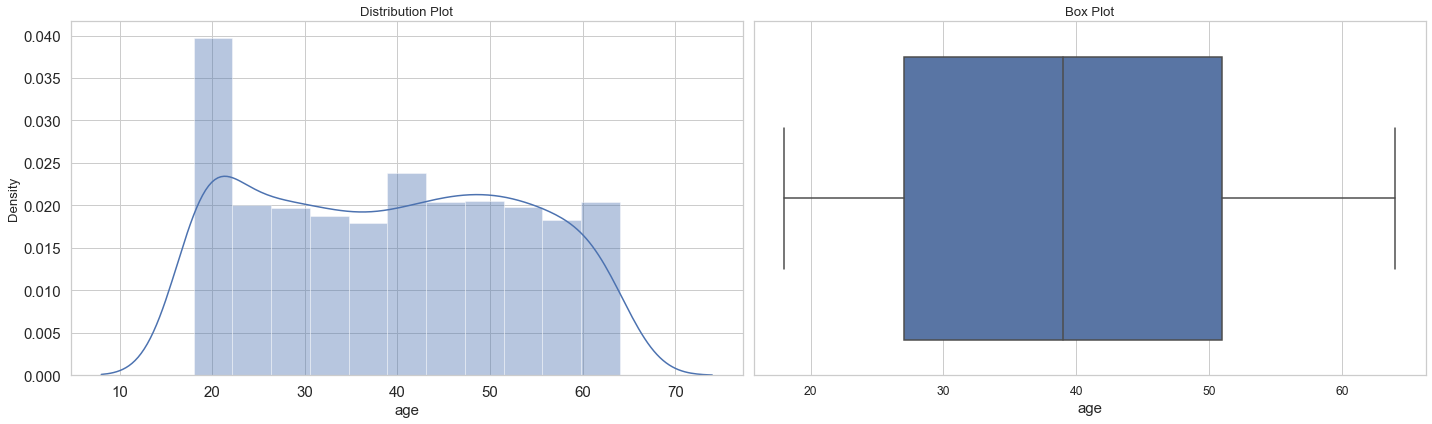

<Figure size 1080x432 with 0 Axes>

<Figure size 432x216 with 0 Axes>

In [230]:
fig, (fig1, fig2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
plt.figure(figsize=[15,6])
fig.set_size_inches(20,6)
sns.distplot(df['age'], ax=fig1)
fig1.tick_params(labelsize=15)
fig1.set_xlabel('age', fontsize=15)
fig1.set_title("Distribution Plot")

sns.boxplot(df['age'], ax=fig2)
fig2.set_title("Box Plot")
fig2.set_xlabel('age', fontsize=15)

plt.figure(figsize=(6,3))
# sns.boxplot(data=df['charges'], orient="h", palette="Set2", dodge=False)

In [231]:
max_age = df['age'].loc[df['age'].idxmax()]      # Maximum age
print(max_age)

64


In [232]:
min_age = df['age'].loc[df['age'].idxmin()]      # Minimum age
print(min_age)

18


In [233]:
age_stats = df['age'].value_counts(ascending=False)
age_greater_than_50 = age_stats[age_stats>50]
age_greater_than_50

18    69
19    68
Name: age, dtype: int64

#####  3f.)  Skewness of ‘bmi’, ‘age’ and ‘charges’ columns

In [234]:
df.skew(axis = 0, skipna = True)    # Output shows that "charges" has highest skewness

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

##### From the above kde distribution plots it is evident that 'charges' is right skewed, 'bmi' is normally distributed with a slight positive sckewness and age column does not have any skewness

In [235]:
# sns.set_style('white')
# sns.distplot(df['bmi'], label = 'Skewness: %.2f'%(df['bmi'].skew()))
# plt.legend(loc = 'best')
# plt.title('BMI Distribution')

###### 3g.)  Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns

From the above box plots it can be observed that bmi and charges column have outliers

In [236]:
outlier_columns = []

Q1 =  df['charges'].quantile(0.25) # 1º Quartile
Q3 =  df['charges'].quantile(0.75) # 3º Quartile
IQR = Q3 - Q1                      # Interquartile range

lbound_charges = Q1 - 1.5 * IQR   # lower bound 
ubound_charges = Q3 + 1.5 * IQR   # upper bound

print('Interquartile range = ', IQR)
print(lbound_charges,'< Charges <',ubound_charges)
print('Numerber of outliers in charges column below the lower bound =', df[df['charges'] < (Q1-(1.5*IQR))]['charges'].count())
print('Numerber of outliers in charges column above the upper bound =', df[df['charges'] > (Q3+(1.5*IQR))]['charges'].count())

Interquartile range =  11899.625365
-13109.1508975 < Charges < 34489.350562499996
Numerber of outliers in charges column below the lower bound = 0
Numerber of outliers in charges column above the upper bound = 139


In [237]:
outlier_columns = []

Q1 =  df['bmi'].quantile(0.25) # 1º Quartile
Q3 =  df['bmi'].quantile(0.75) # 3º Quartile
IQR = Q3 - Q1                      # Interquartile range

lbound_bmi = Q1 - 1.5 * IQR   # lower bound 
ubound_bmi = Q3 + 1.5 * IQR   # upper bound

print('Interquartile range = ', IQR)
print(lbound_bmi,'< BMI <',ubound_bmi)
print('Numerber of outliers in BMI column below the lower bound =', df[df['bmi'] < (Q1-(1.5*IQR))]['bmi'].count())
print('Numerber of outliers in BMI column above the upper bound =', df[df['bmi'] > (Q3+(1.5*IQR))]['bmi'].count())

Interquartile range =  8.3975
13.7 < BMI < 47.290000000000006
Numerber of outliers in BMI column below the lower bound = 0
Numerber of outliers in BMI column above the upper bound = 9


##### 3h.) Distribution of categorical columns (include children) 

Text(0.5, 1.0, 'Distribution of Children category')

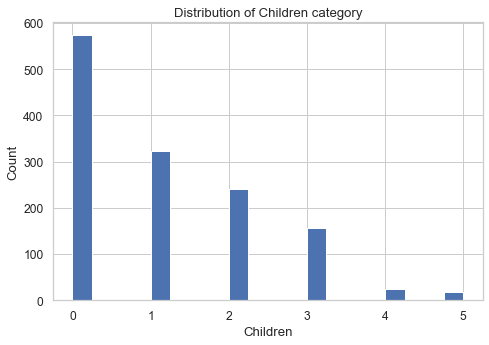

In [238]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [7, 5]})
sns.distplot(
    df['children'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='Children', ylabel='Count');
plt.title('Distribution of Children category') 

Text(0.5, 1.0, 'Distribution of number of children for the people that smoke and do not smoke')

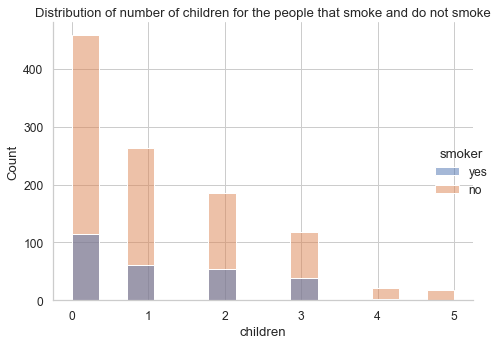

In [239]:
sns.displot(df, x='children', kind='hist', hue='smoker', aspect=1.2)
plt.title('Distribution of number of children for the people that smoke and do not smoke') 

In [240]:
df["children"].nunique()

6

In [241]:
df["children"].unique()

array([0, 1, 3, 2, 5, 4], dtype=int64)

In [242]:
df.children.value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

Text(0.5, 1.0, 'Distribution of Genders')

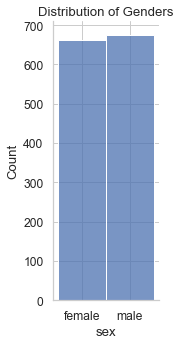

In [243]:
sns.displot(df, x='sex', kind='hist', aspect=0.5)
plt.title('Distribution of Genders') 

Text(0.5, 1.0, 'Distribution of gender by smoking habits')

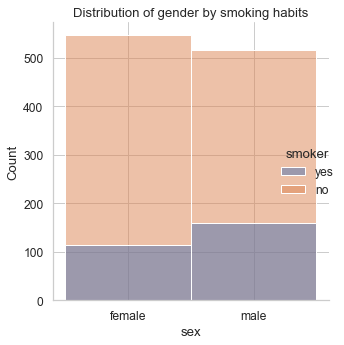

In [244]:
# 4c.) Is the proportion of smokers significantly different in different genders? 
sns.displot(df, x='sex', kind='hist', hue='smoker', aspect=0.8)
plt.title('Distribution of gender by smoking habits') 

In [245]:
df.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

Text(0.5, 1.0, 'Distribution of Smoking habits')

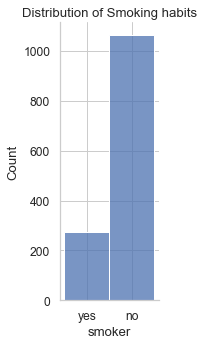

In [246]:
sns.displot(df, x='smoker', kind='hist', aspect=0.5)
plt.title('Distribution of Smoking habits') 

In [247]:
df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

Text(0.5, 1.0, 'Region wise distribution for smoking habits')

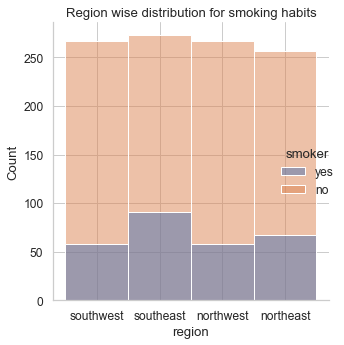

In [248]:
sns.set_style('whitegrid')
# sns.catplot('sex', col = 'smoker', hue = 'region', data = df, kind = 'count')
sns.displot(df, x='region', kind='hist', hue='smoker', aspect=0.8)
plt.title('Region wise distribution for smoking habits') 

In [249]:
df.region.value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

##### 3i.) Pair plot that includes all the columns of the data frame 

Text(0.5, 1.0, 'Pair plots depicting the correlation between all the columns')

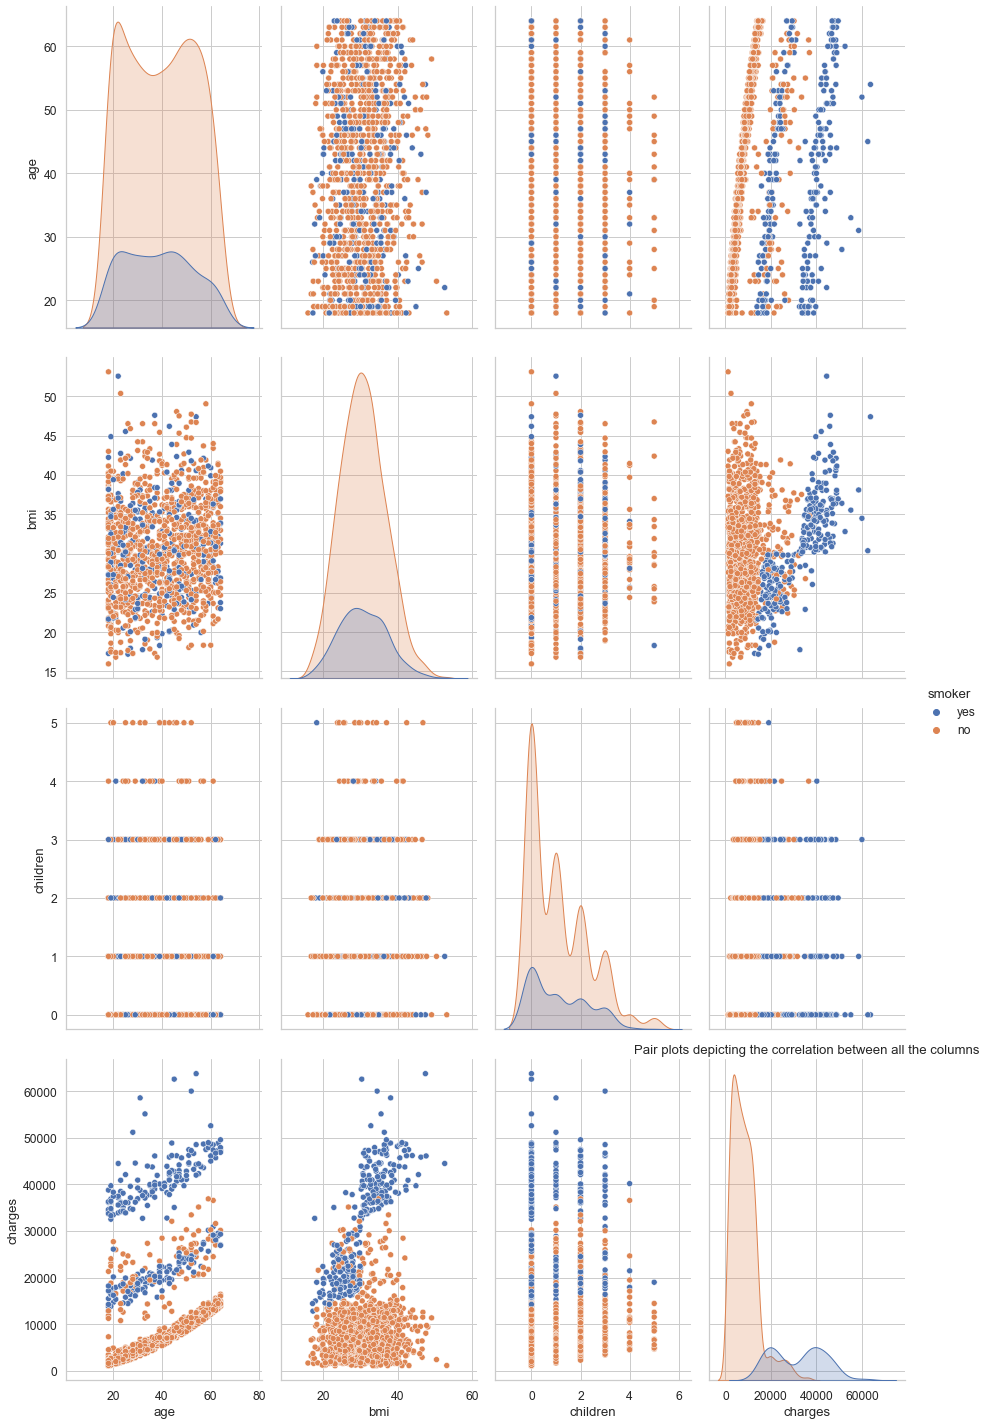

In [250]:
sns.pairplot(df, hue = 'smoker', height=5, aspect=0.6)
plt.title('Pair plots depicting the correlation between all the columns') 

##### 4a.)   Do charges of people who smoke differ significantly from the people who don't? 

Text(0.5, 1.0, 'Distribution of charges for the smoking habits')

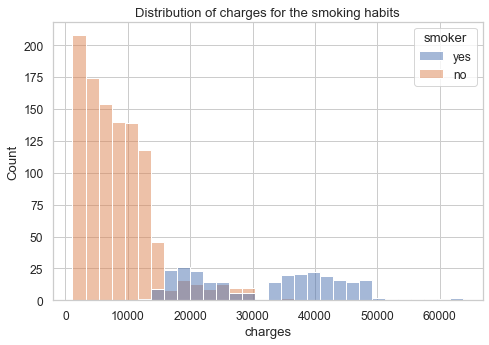

In [251]:
sns.histplot(x = 'charges', hue = 'smoker', data = df)
plt.title('Distribution of charges for the smoking habits')

Text(0.5, 1.0, ' Plots showing charges by smoking habits')

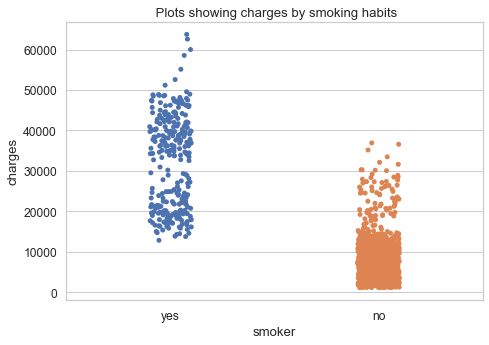

In [252]:
sns.stripplot(y = df['charges'], x = df['smoker'])
plt.title(' Plots showing charges by smoking habits')

<AxesSubplot:xlabel='charges', ylabel='smoker'>

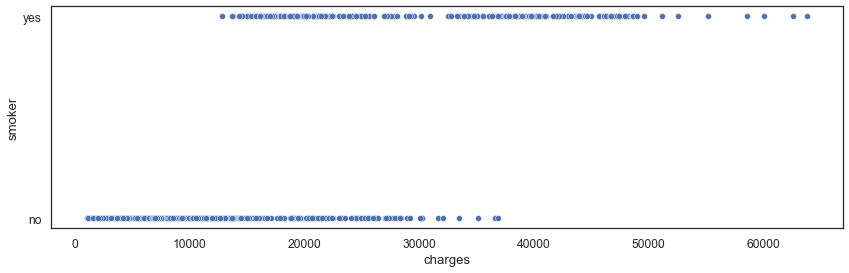

In [253]:
sns.set_style('white')
plt.figure(figsize = (12, 4))
sns.scatterplot(y = df['smoker'], x = df['charges'])

In [254]:
df.groupby(['smoker'])['charges'].max()

smoker
no     36910.60803
yes    63770.42801
Name: charges, dtype: float64

In [255]:
df.groupby(['smoker'])['charges'].min()

smoker
no      1121.8739
yes    12829.4551
Name: charges, dtype: float64

In [256]:
df.groupby(['smoker'])['charges'].mean()

smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64

Charges of people who smoke differ significantly from the people who don't. 
The insurance plan for a smoker/non-smoker is influenced by different factors. For a smoker it starts from around 13000 and it can go upto 64000 whereas for a non-smoker it is much less i.e: around 1150 and it can be as high as 37000 
The average charge a smoker pays is 8435 and for a non-smoker it is 32050  

##### 4b.) b. Does bmi of males differ significantly from that of females? 

Text(0.5, 1.0, 'Distribution of BMI across different sex')

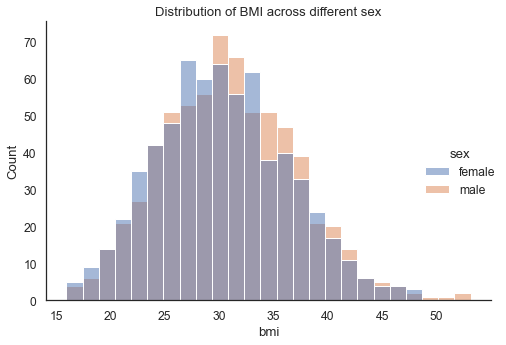

In [257]:
sns.displot(df, x='bmi', kind='hist', hue='sex', aspect=1.2)
plt.title('Distribution of BMI across different sex') 

Text(0.5, 1.0, 'Distribution of BMI for male and female')

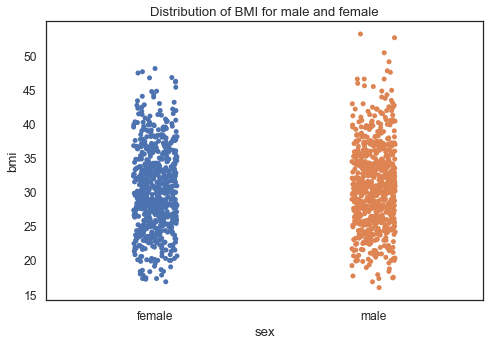

In [258]:
sns.stripplot(y = df['bmi'], x = df['sex'])
plt.title('Distribution of BMI for male and female') 

In [259]:
df.groupby(['sex'])['bmi'].max()

sex
female    48.07
male      53.13
Name: bmi, dtype: float64

In [260]:
df.groupby(['sex'])['bmi'].min()

sex
female    16.815
male      15.960
Name: bmi, dtype: float64

In [261]:
df.groupby(['sex'])['bmi'].mean()

sex
female    30.377749
male      30.943129
Name: bmi, dtype: float64

The minimum bmi of a man in the given dataset is 15.960 whereas for woman it is 16.815
The maximum bmi of a man and a woman is 53.13 and 48.07 respectively
And the average BMI of a man and woman falls in the same range therefore bmi of males do not differ significantly from that of females

##### 4c.)  Is the proportion of smokers significantly different in different genders? 

In [262]:
df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

Text(0.5, 1.0, 'Distribution of smokers across different sex')

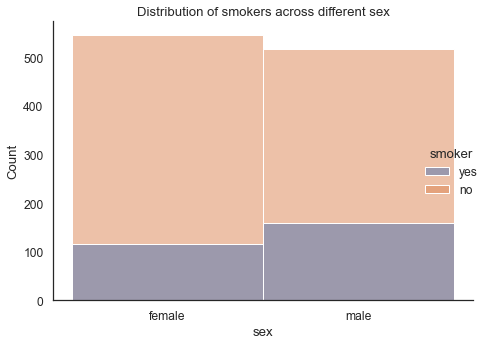

In [263]:
sns.displot(df, x='sex', kind='hist', hue='smoker', aspect=1.2)
plt.title('Distribution of smokers across different sex') 

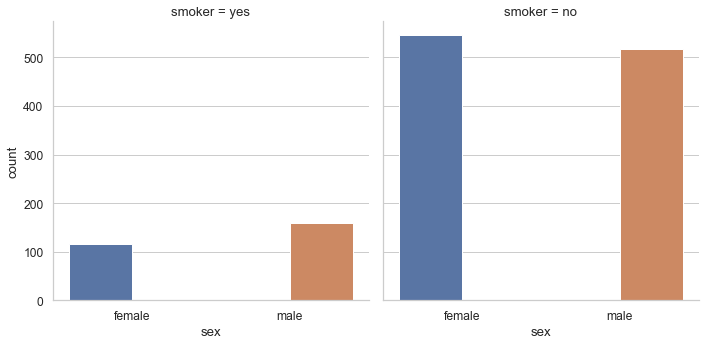

In [264]:
sns.set_style('whitegrid')
sns.catplot('sex', col = 'smoker', hue = 'sex', data = df, kind = 'count')

In [265]:
df.groupby(['smoker', 'sex']).count()

age  bmi  children  region  charges
smoker sex                                        
no     female  547  547       547     547      547
       male    517  517       517     517      517
yes    female  115  115       115     115      115
       male    159  159       159     159      159

In [266]:
df_women_that_smoke = df[(df.sex == 'female') & (df.smoker == 'yes')].groupby('bmi').max()

df_women_that_smoke.head()

,age,sex,children,smoker,region,charges
bmi,,,,,,
17.195,26,female,2,yes,northeast,14455.64405
17.765,32,female,2,yes,northwest,32734.18630
17.955,27,female,2,yes,northeast,15006.57945
18.300,39,female,5,yes,southwest,19023.26000
19.095,33,female,2,yes,northeast,16776.30405


In [267]:
df_men_that_smoke = df[(df.sex == 'male') & (df.smoker == 'yes')].groupby('bmi').max()
df_men_that_smoke.head()

,age,sex,children,smoker,region,charges
bmi,,,,,,
17.29,18,male,2,yes,northeast,12829.4551
19.30,38,male,0,yes,southwest,15820.6990
19.80,40,male,1,yes,southeast,17179.5220
19.95,56,male,0,yes,northeast,22412.6485
20.13,43,male,2,yes,southeast,18767.7377


In [268]:
df_men_that_do_not_smoke = df[(df.sex == 'male') & (df.smoker == 'no')].groupby('bmi').max()
df_men_that_do_not_smoke.head()

,age,sex,children,smoker,region,charges
bmi,,,,,,
15.960,18,male,0,no,northeast,1694.79640
16.815,38,male,2,no,northeast,6640.54485
17.385,23,male,1,no,northwest,2775.19215
17.480,19,male,0,no,northwest,1621.34020
17.670,26,male,0,no,northwest,2680.94930


In [269]:
df_women_that_do_not_smoke = df[(df.sex == 'female') & (df.smoker == 'no')].groupby('bmi').max()
df_women_that_do_not_smoke.head()

,age,sex,children,smoker,region,charges
bmi,,,,,,
16.815,21,female,1,no,northeast,3167.45585
17.290,37,female,2,no,northeast,6877.98010
17.400,21,female,1,no,southwest,2585.26900
17.800,19,female,0,no,southwest,1727.78500
18.050,51,female,0,no,northwest,9644.25250


In [270]:
# df_women_that_do_not_smoke.mean(axis='index')
df_men_that_do_not_smoke_2 = df[(df.sex == 'male') & (df.smoker == 'no')]
df_men_that_do_not_smoke_2.head(2)

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


In [271]:
df_women_that_do_not_smoke_2 = df[(df.sex == 'female') & (df.smoker == 'no')]
df_women_that_do_not_smoke_2.head(2)

,age,sex,bmi,children,smoker,region,charges
5,31,female,25.74,0,no,southeast,3756.6216
6,46,female,33.44,1,no,southeast,8240.5896


In [272]:
df_women_that_do_not_smoke_2.mean(axis='index')

age           39.691042
bmi           30.539525
children       1.087751
charges     8762.297300
dtype: float64

In [273]:
max_bmi_of_women_that_donot_smoke = df_women_that_do_not_smoke_2['bmi'].loc[df_women_that_do_not_smoke_2['bmi'].idxmax()]      # Maximum age
max_bmi_of_women_that_donot_smoke

48.07

In [274]:
min_bmi_of_women_that_donot_smoke = df_women_that_do_not_smoke_2['bmi'].loc[df_women_that_do_not_smoke_2['bmi'].idxmin()]      # Maximum age
min_bmi_of_women_that_donot_smoke

16.815

Smoking habits of different genders
There are 1064 non-smokers out of which 547 are female and 517 male
There are 274 smokers out of which 115 are female and 159 male
The proportion of smokers is significantly different in different genders. 

##### 4d.)  Is the distribution of bmi across women with no children, one child and two children, the same?

Text(0.5, 1.0, 'BMI by Sex category, further distinguished by number of children')

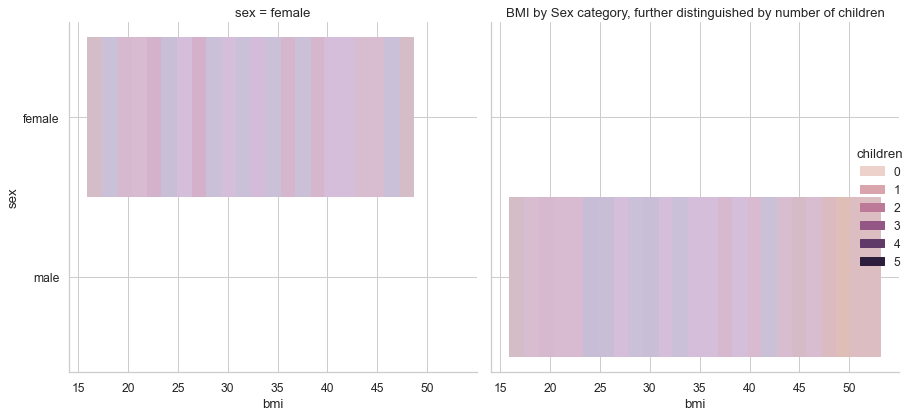

In [275]:
sns.displot(df, x='bmi', y = 'sex', kind='hist', hue='children', col='sex', height=6, aspect=1)
plt.title('BMI by Sex category, further distinguished by number of children') 

In [276]:
df_children_less_than_3 = df[(df.children < 3) & (df.sex == 'female')]
df_children_less_than_3.head(12)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
9,60,female,25.840,0,no,northwest,28923.13692
11,62,female,26.290,0,yes,southeast,27808.72510
13,56,female,39.820,0,no,southeast,11090.71780
16,52,female,30.780,1,no,northeast,10797.33620
20,60,female,36.005,0,no,northeast,13228.84695
21,30,female,32.400,1,no,southwest,4149.73600
23,34,female,31.920,1,yes,northeast,37701.87680


In [277]:
df_f_children_less_than_3 = df_children_less_than_3.groupby(['children']).size()
df_f_children_less_than_3

children
0    289
1    158
2    119
dtype: int64

In [278]:
df2 = df_children_less_than_3[['sex', 'bmi', 'children']]
df2

,sex,bmi,children
0,female,27.90,0
5,female,25.74,0
6,female,33.44,1
9,female,25.84,0
11,female,26.29,0
...,...,...,...
1331,female,33.40,0
1334,female,31.92,0
1335,female,36.85,0
1336,female,25.80,0


Text(0.5, 1.0, 'Distribution of Children of a female for the values 0, 1, 2')

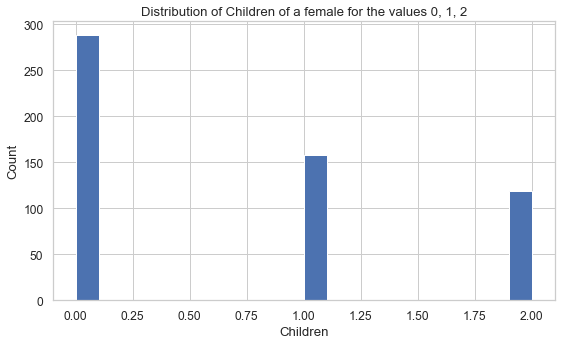

In [279]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    df2['children'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='Children', ylabel='Count');
plt.title('Distribution of Children of a female for the values 0, 1, 2') 

Text(0.5, 1.0, 'BMI by Number of children(0, 1, 2)')

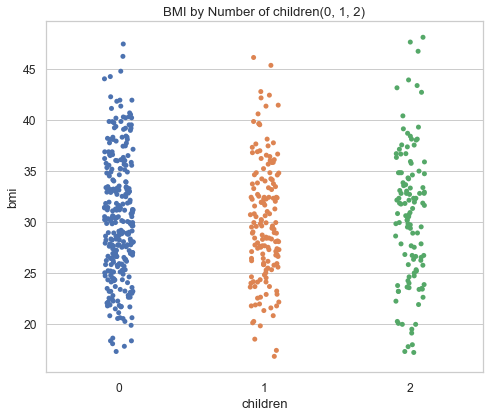

In [280]:
plt.figure(figsize = (7, 6))
sns.stripplot(y = df2['bmi'], x = df2['children'])
plt.title('BMI by Number of children(0, 1, 2)')

Text(0.5, 1.0, 'Distribution of BMI category of women with 0, 1, 2 children')

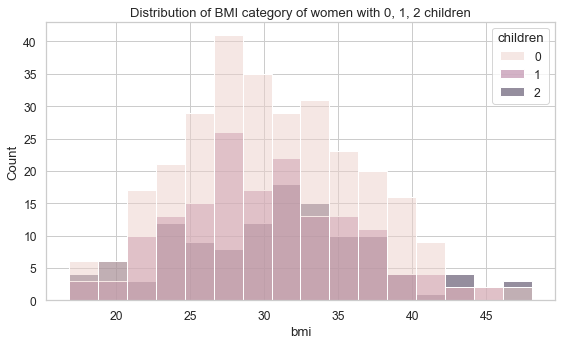

In [281]:
sns.histplot(x = 'bmi', hue = 'children', data = df2)
plt.title('Distribution of BMI category of women with 0, 1, 2 children')

<AxesSubplot:title={'center':'BMI by Number of children(0, 1, 2)'}, xlabel='bmi', ylabel='children'>

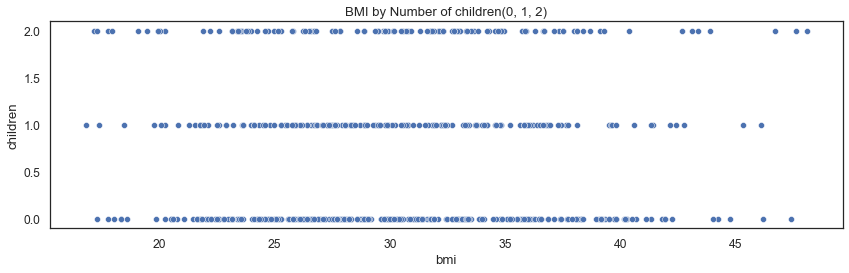

In [282]:
sns.set_style('white')
plt.figure(figsize = (12, 4))
plt.title('BMI by Number of children(0, 1, 2)')
sns.scatterplot(x=df2['bmi'], y=df2['children'])

Text(0.5, 1.0, 'BMI by Number of children(0, 1, 2)')

<Figure size 1080x576 with 0 Axes>

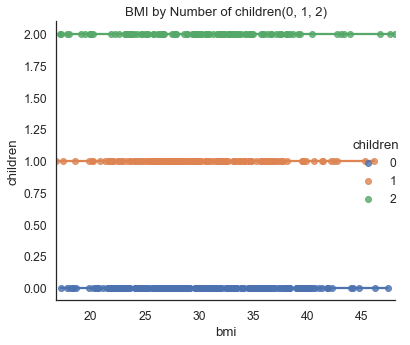

In [283]:
plt.figure(figsize=(15,8))
sns.lmplot(x = 'bmi', y= 'children', hue = 'children', data = df2)
plt.title('BMI by Number of children(0, 1, 2)')

Text(0.5, 1.0, 'Children by BMI Category')

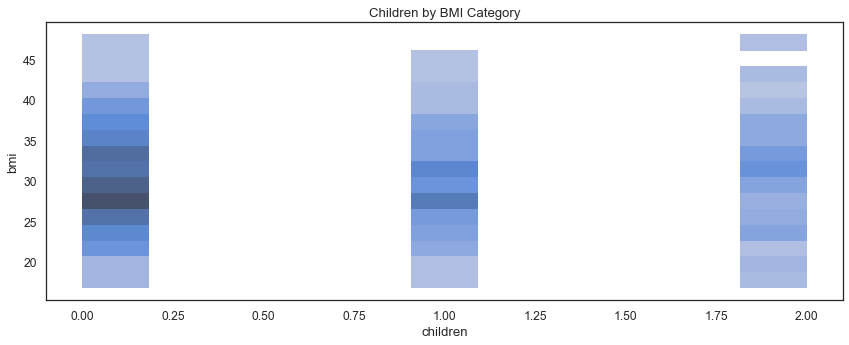

In [284]:
sns.set_style('white')
plt.figure(figsize = (12, 5))
sns.histplot(x = df2['children'], y = df2['bmi'])
plt.title('Children by BMI Category')

Text(0.5, 1.0, 'Box plot of children by BMI category')

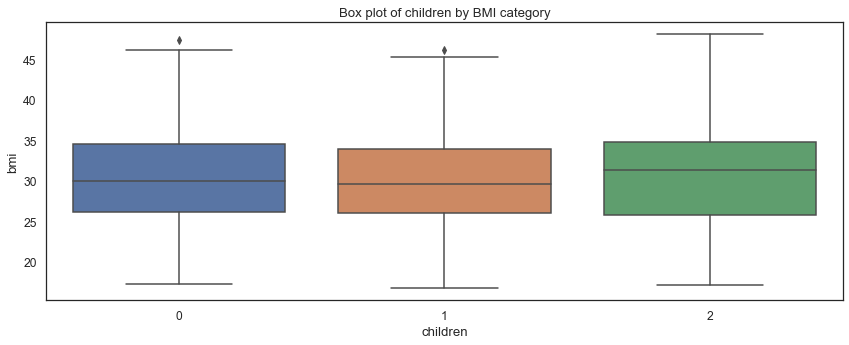

In [285]:
sns.set_style('white')
plt.figure(figsize = (12, 5))
sns.boxplot(y = df2['bmi'], x = df2['children'])
plt.title('Box plot of children by BMI category')

In [286]:
df2.groupby(['children'])['bmi'].mean()

children
0    30.361522
1    30.052658
2    30.649790
Name: bmi, dtype: float64

There 289 women with no children, 158 women with 1 child and 119 women with 2 children
The distribution of bmi across women with no children, one child and two children is almost same
The average bmi of women with 0, 1 and 2 children is in the exact same range (i.e 30)

##### Plot showing correlation of all the attributes

<AxesSubplot:>

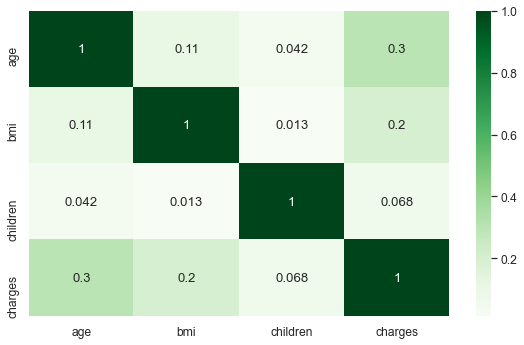

In [287]:
corr = df.corr() 
sns.heatmap(corr, annot=True, cmap='Greens')